In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline


In [5]:
from sklearn.datasets import make_blobs

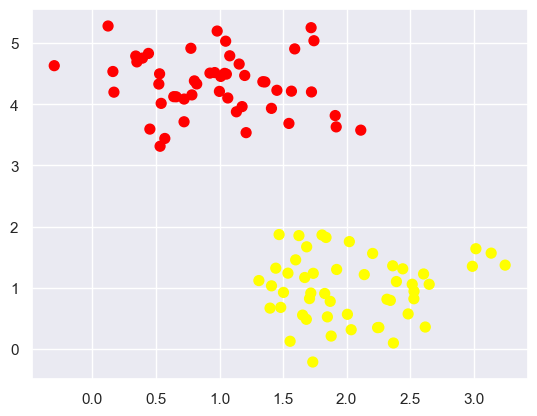

In [7]:
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

(-1.0, 3.5)

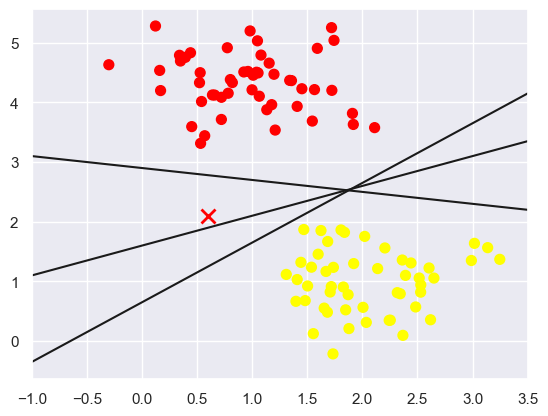

In [9]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
 plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)


(-1.0, 3.5)

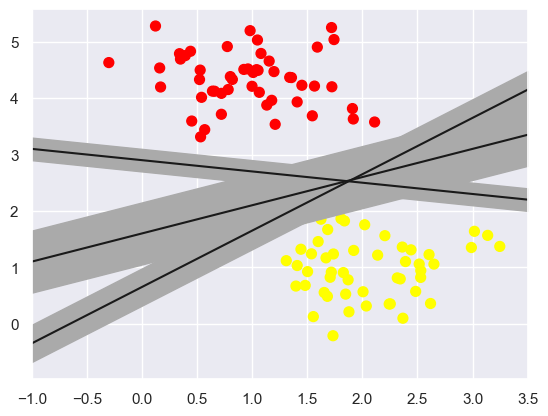

In [11]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
 yfit=m*xfit+b
 plt.plot(xfit,yfit,'-k')
 plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)

In [12]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
     """Plot the decision function for a 2D SVC"""
     if ax is None:
       ax = plt.gca()
     xlim = ax.get_xlim()
     ylim = ax.get_ylim()
 
     # create grid to evaluate model
     x = np.linspace(xlim[0], xlim[1], 30)
     y = np.linspace(ylim[0], ylim[1], 30)
     Y, X = np.meshgrid(y, x)
     xy = np.vstack([X.ravel(), Y.ravel()]).T
     P = model.decision_function(xy).reshape(X.shape)
 
     # plot decision boundary and margins
     ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])
 
     # plot support vectors
     if plot_support:
         ax.scatter(model.support_vectors_[:, 0],
             model.support_vectors_[:, 1],
             s=300, linewidth=1, facecolors='none');
     ax.set_xlim(xlim)
     ax.set_ylim(ylim)

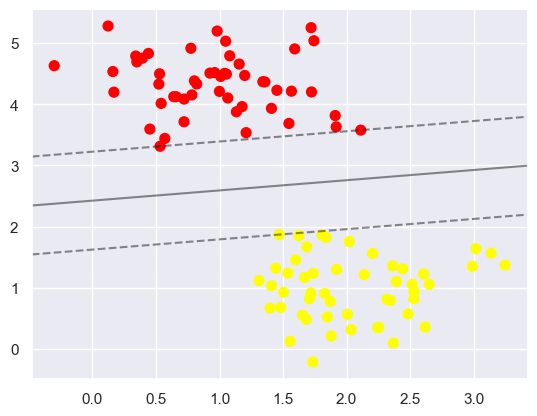

In [15]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [16]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

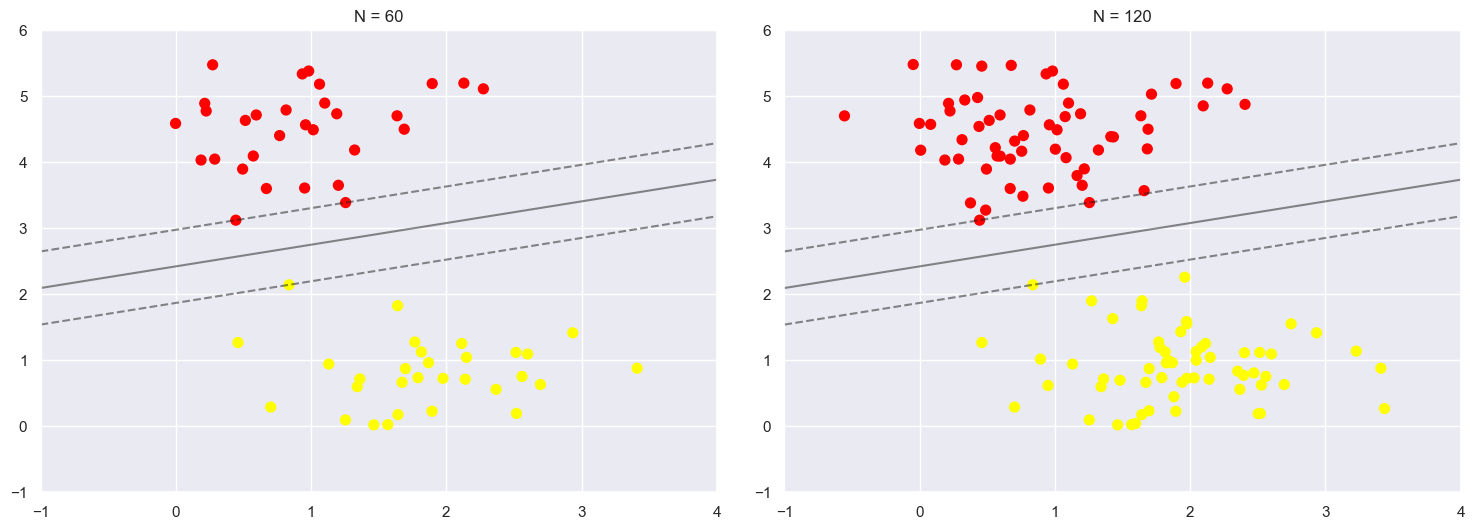

In [20]:
def plot_svm(N=10, ax=None):
 X, y = make_blobs(n_samples=200, centers=2,
               random_state=0, cluster_std=0.60)
 X = X[:N]
 y = y[:N]
 model = SVC(kernel='linear', C=1E10)
 model.fit(X, y)
 
 ax = ax or plt.gca()
 ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
 ax.set_xlim(-1, 4)
 ax.set_ylim(-1, 6)
 plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
 plot_svm(N, axi)
 axi.set_title('N = {0}'.format(N))

In [21]:
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,100,200,400,234],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 400, 234), value=10), Output()), _dom_c…

<function __main__.plot_svm(N=10, ax=None)>

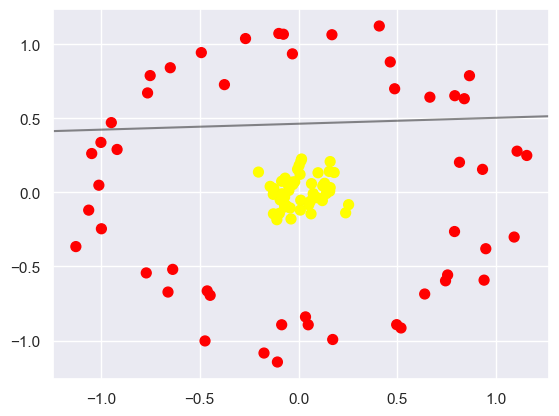

In [19]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

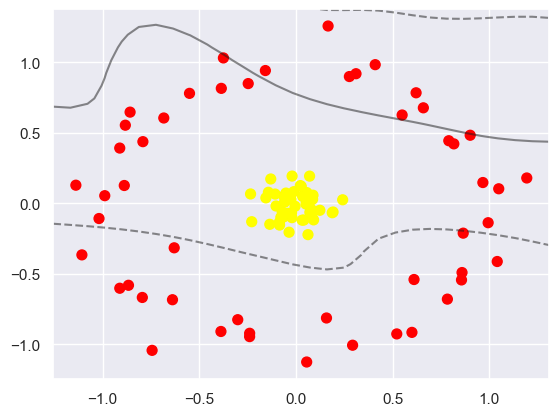

In [22]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='sigmoid').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)